# **Project**
# **Credit Card Approval Prediction**

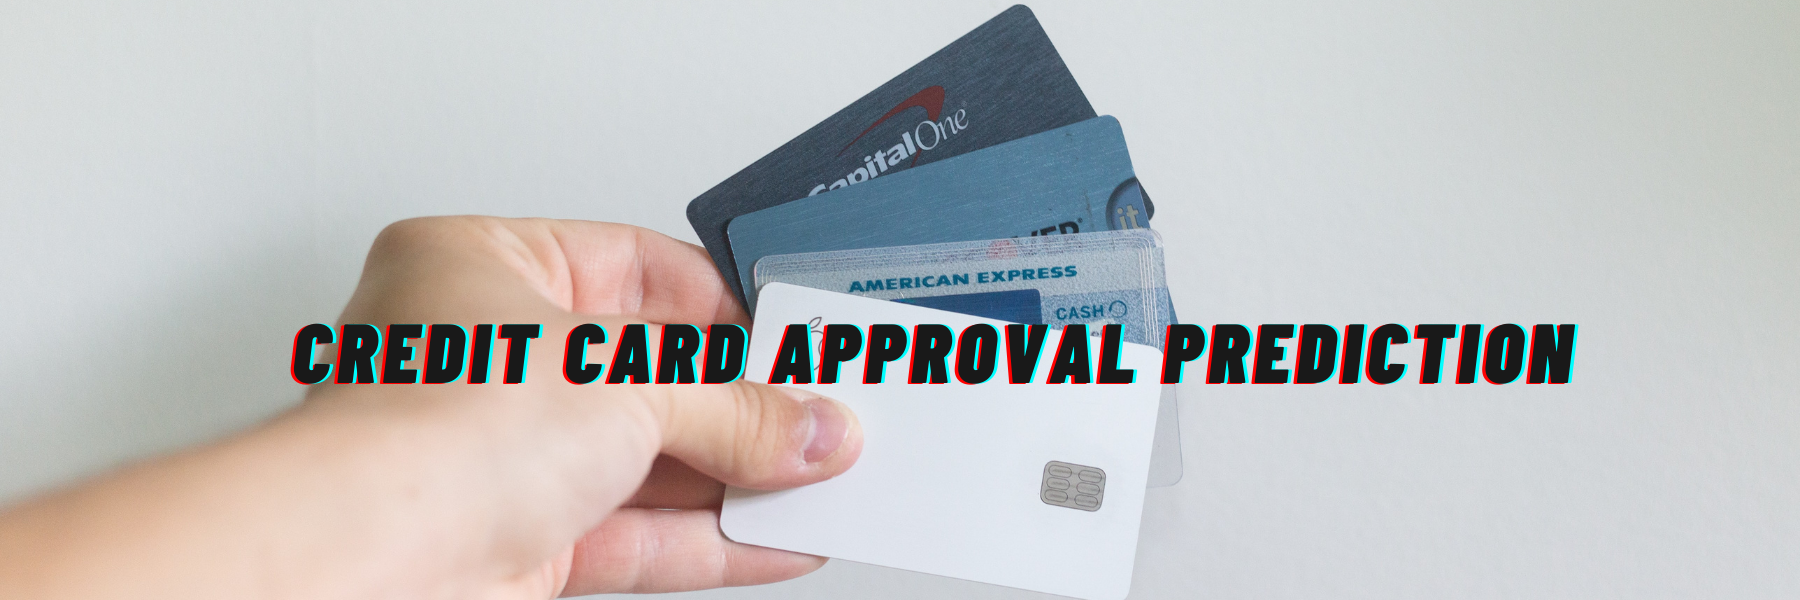

# **INTRODUCTION**

A credit card is like a handy way to buy things today and pay for them later. It's a special card you get from a bank, and when you use it to buy stuff, you're actually borrowing money. That means you owe the bank the amount you've spent. If you don't pay back everything you owe each month, you'll be charged an extra fee called "interest."

But if you use it wisely, credit cards can help you build a good credit history and help you manage your finances.

# Importance in Today's world:

Credit scores are a common way for banks to evaluate if you're a risky borrower.The bank is able to decide whether to issue a credit card to the applicant. A credit card prediction project is important because it contributes to responsible lending, risk management, efficient decision-making, and access to credit.

# Importance of Predicting a good client:

Credit risk assessment in banks primarily focuses on predicting the likelihood of customer defaults and estimating the potential costs if they occur. To make informed decisions, it's vital to consider key factors and anticipate default probabilities based on customer circumstances. Machine learning models play a crucial role in enabling banks and financial institutions to forecast customer default risk accurately. This project's aim is to develop the most accurate machine learning model for this purpose.

# Impact on Banking Sector:

Banks receive a lot of credit card applications. Many of the applications do not get approved for a variety of reasons, like increased loan balances,poor-income levels,poor credit history/score. Manually analysing these applications can be very time consuming and full of human errors. Hence we can automate this task with the help of machine learning.

# Proposed method can be helpful if required in future for any bank in India.

The proposed credit risk prediction method can help banks in India by enhancing decision-making, reducing financial risks, improving efficiency, promoting financial inclusion, ensuring regulatory compliance, and gaining a competitive advantage in the banking industry. It is a valuable tool for responsible lending and financial management.

# **Hypothesis**

- Male applicants will get more approval than female

- Applicants with higher incomes are more likely to be approved for credit cards.

- Decision Tree Classifier is going to predict credit card approval better than Random Forest classifier

**Import libraries**

In [ ]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import os

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print(os.listdir())   # Return a list containing the names of the files in the directory.

['.config', '.ipynb_checkpoints', 'Credit_card_label.csv', 'Cleaned_dataset', 'Credit_card.csv', 'sample_data']


In [ ]:
# read dataset

aa=pd.read_csv('/content/Credit_card.csv')
bb=pd.read_csv('/content/Credit_card_label.csv')

In [ ]:
aa.head()   # This function returns the first n rows from dataset

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:
bb.head()   # This function returns the first n rows from dataset

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [ ]:
cc=pd.merge(aa,bb,on='Ind_ID',how='outer') # merging two data set based on 'Ind_ID' column.

In [ ]:
cc.head(2)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
cc.shape          # shape of the DataFrame

(1548, 19)

In [ ]:
cc.size        # Size of the DataFrame

29412

In [ ]:
cc.ndim         # dimension of dataframe

2

# **Data Preprocessing**

# Understanding and Manupulating Data Set

In [ ]:
cc.info()   # Print a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
cc.nunique()          # Checking the Unique value


Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [ ]:
cc.isnull().sum()         # Detect missing values.

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
cc.columns   # check the all columns in the dataset

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [ ]:
cc['GENDER'].unique()

array(['M', 'F', nan], dtype=object)

In [ ]:
cc[cc['GENDER']=='M'].count()    # Count the number of rows where the 'GENDER' column equals 'M'


Ind_ID             568
GENDER             568
Car_Owner          568
Propert_Owner      568
CHILDREN           568
Annual_income      559
Type_Income        568
EDUCATION          568
Marital_status     568
Housing_type       568
Birthday_count     558
Employed_days      568
Mobile_phone       568
Work_Phone         568
Phone              568
EMAIL_ID           568
Type_Occupation    438
Family_Members     568
label              568
dtype: int64

**'Count of Male gender is 568'**

In [ ]:
cc[cc['GENDER']=='F'].count()   # Count the number of rows where the 'GENDER' column equals 'F'


Ind_ID             973
GENDER             973
Car_Owner          973
Propert_Owner      973
CHILDREN           973
Annual_income      959
Type_Income        973
EDUCATION          973
Marital_status     973
Housing_type       973
Birthday_count     961
Employed_days      973
Mobile_phone       973
Work_Phone         973
Phone              973
EMAIL_ID           973
Type_Occupation    617
Family_Members     973
label              973
dtype: int64

**'Count of Female gender is 973'**

 The mode here in gender is **females**. So we can replace the null values to the **mode value**.

In [ ]:
cc['GENDER']=cc['GENDER'].fillna('F')    # fill the null values with "F" in Gender column

In [ ]:
cc['Annual_income'].mean()     # check the mean of the Annual_income column.

191399.3262295082

We can replace the null values in the 'Annual_income' column with the **mean 'Annual_income**' value.



In [ ]:
cc['Annual_income'] =cc['Annual_income'].fillna(cc['Annual_income'].mean())  # fill the null values with mean of annual_income in Gender column

In [ ]:
cc['Birthday_count'].count()        # Count the number of non-null entries in the 'Birthday_count' column


1526

In [ ]:
cc['Birthday_count'].mean()   # Calculate the mean of the 'Birthday_count' column


-16040.342070773264

We can replace the null values in the 'Birthday_count' column with the **mean 'Birthday_count**' value.

In [ ]:
cc['Birthday_count'] =cc['Birthday_count'].fillna(cc['Birthday_count'].mean())

In [ ]:
cc['Type_Occupation'].value_counts()

Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

In [ ]:
cc['Type_Occupation'].mode()  # check the mode value in Type_Occupation column.

0    Laborers
Name: Type_Occupation, dtype: object

The mode here in 'Type_Occupation' is **Laborers**. So we can replace the null values to the **mode value**.

In [ ]:
cc['Type_Occupation'] =cc['Type_Occupation'].fillna('Laborers')

In [ ]:
cc.isnull().sum()   # check the null values.

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

Now, no column has null values.

In [ ]:
cc.columns   #  retrieves and lists all the features present in the DataFrame 'cc'.


Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [ ]:
cc.dtypes  # datatype of each column.

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

In [ ]:
cc.duplicated().sum()  # checking is there duplicate data in dataset or not

0

In [ ]:
cc.describe(include='all')        # Generate descriptive statistics.

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
count,1.548000e+03,1548,1548,1548,1548.000000,1.548000e+03,1548,1548,1548,1548,1548.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548,1548.000000,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN
freq,NaN,980,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,756,NaN,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499,0.113049
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.124080e+05,NaN,NaN,NaN,NaN,4199.321477,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772,0.316755
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,0.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19476.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.710000e+05,NaN,NaN,NaN,NaN,-15814.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12483.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,0.000000


In [ ]:
for col in cc:
  print(col)
  print(cc[col])
  print('_ _'*70)

Ind_ID
0       5008827
1       5009744
2       5009746
3       5009749
4       5009752
         ...   
1543    5028645
1544    5023655
1545    5115992
1546    5118219
1547    5053790
Name: Ind_ID, Length: 1548, dtype: int64
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
GENDER
0       M
1       F
2       F
3       F
4       F
       ..
1543    F
1544    F
1545    M
1546    M
1547    F
Name: GENDER, Length: 1548, dtype: object
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
Car_Owner
0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1543    N
1544    N
1545    Y
1546    Y
1547    Y
Name: Car_Owner, Length: 1548, dtype: object
_ __ __ __ __ __ __ __ __ __ _

In [ ]:
# Save the DataFrame 'cc' to a CSV file named 'Cleaned_dataset'

cc.to_csv('Cleaned_dataset')

# **EDA** - Exploratory Data Analysis

**Univariate Analaysis**
*   Histogram
*   Pie Chart

In [ ]:
cc.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

**Histogram**

In [ ]:
for col in cc.columns:

  # Set the figure size
  plt.figure(figsize=(8,6))

  # Create a histogram using Seaborn
  sns.histplot(cc[col],color=sns.color_palette('husl')[2],ec='black')  # create a histogram

  # Set labels and title of the histogram
  plt.title(f'Univariate Analysis: {col}')   # title of histogram
  plt.xlabel(col)
  plt.ylabel('Count')

  # Rotate x-axis labels for better readability
  plt.xticks(rotation=35)

  # Display the histogram
  plt.show()

Insights:
- Most of the applicants are females.
- Most of the applicants do not own car, but they own property.
- From the graph it was found that, more than 1000 applicants do not have children.
- From the Annual income histogram, the graph is right skewed whcih implies that most of the applicants are present towards right of the peak. The peak is pointed at approximate value 0.12.
- From the above histogram we can observe most of the applicants source of income is through working.
- Most of the applicants education level is secondary/secondary special.
- Most of the applicants are married.
- Most of the applicants own house/apartments.
- Birthday count values are normally distributed.
- many of the applicants have lesser employed days.
- Each and every applicant has mobile phones.
- Most of the applicants do not have work phone.
- Only few of the applicants have email-ID.
- Most of the applicants are labourer's by occupation.
- Most of the applicants have 2 members in the family.
- Most of the applicants credit card is approved.

In [ ]:
cc.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

**Pie Chart**

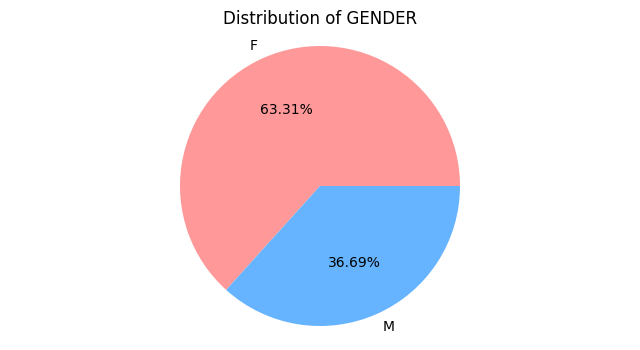

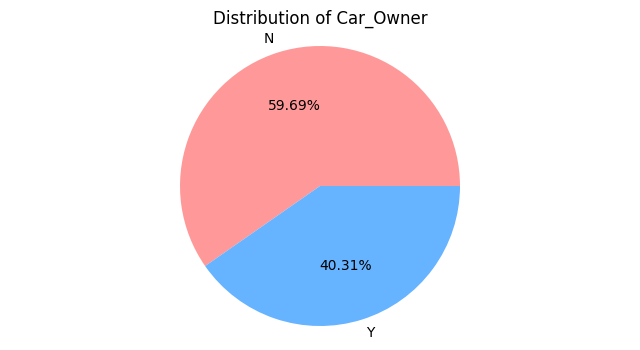

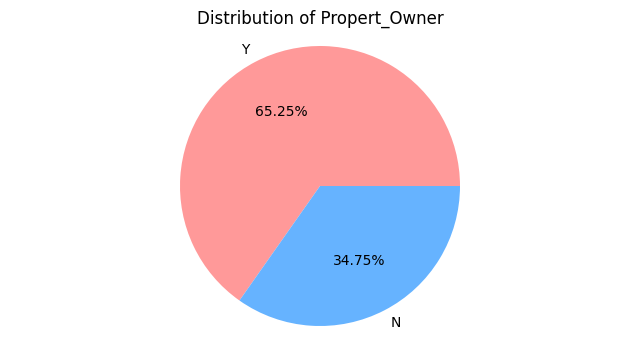

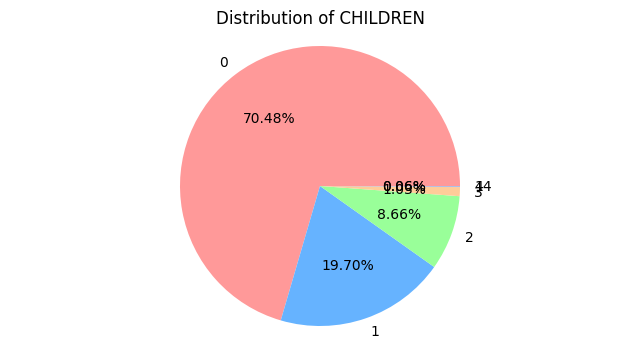

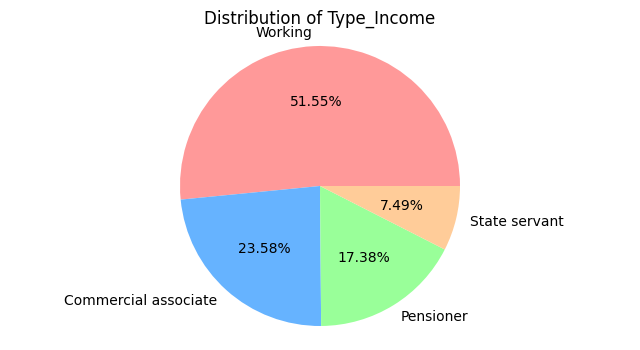

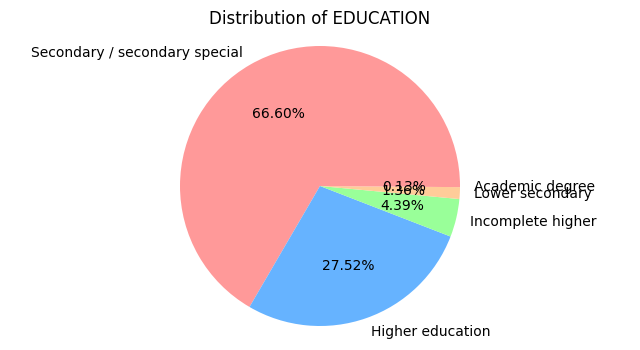

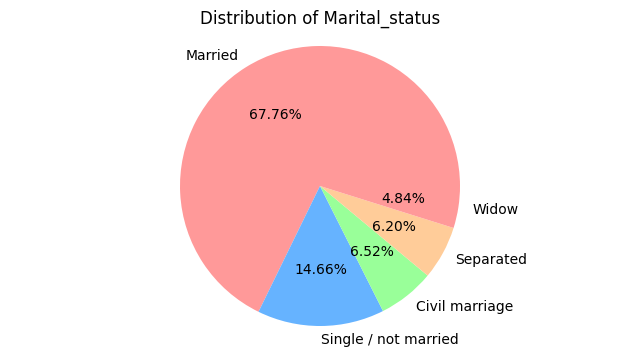

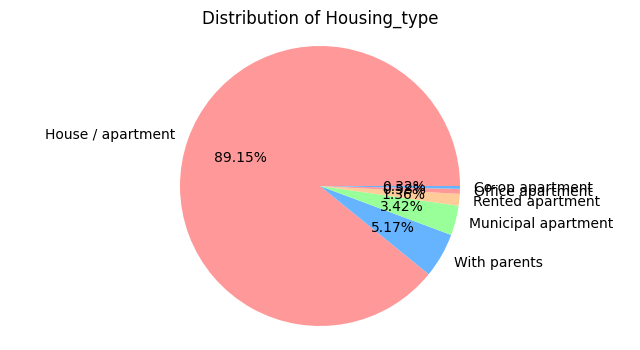

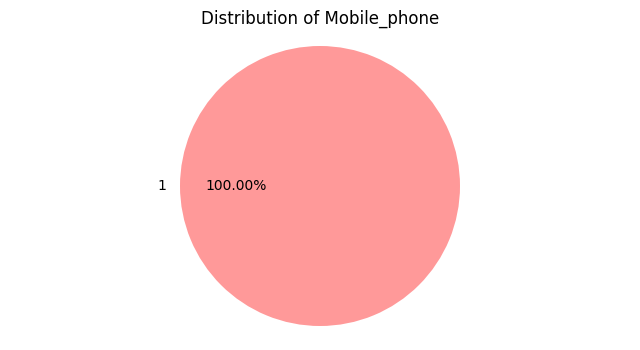

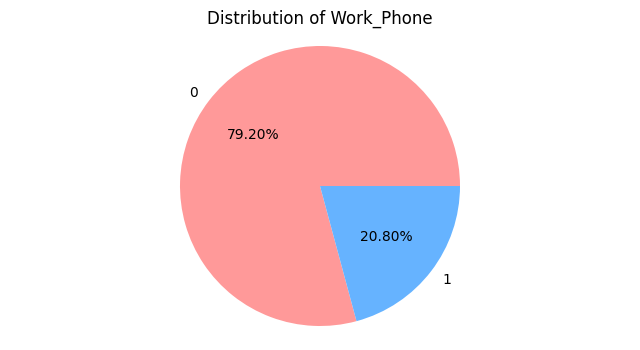

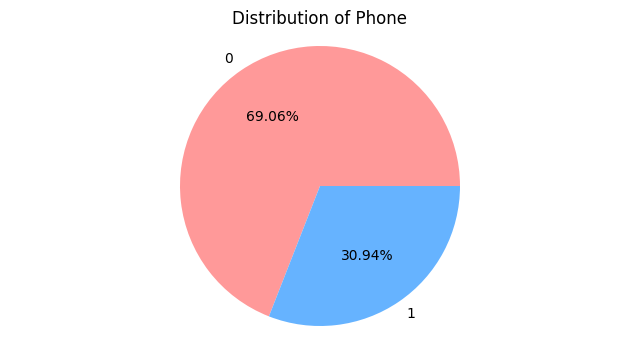

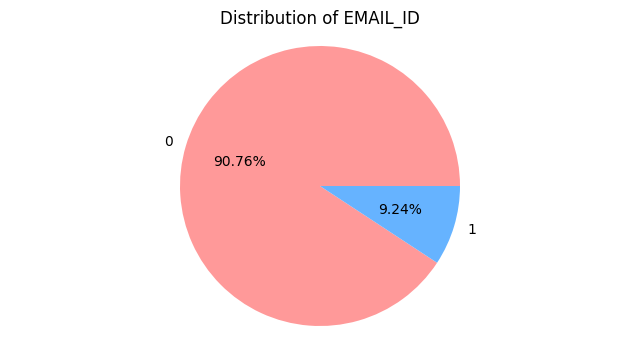

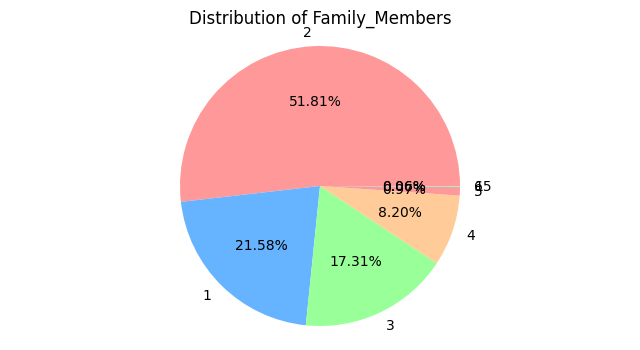

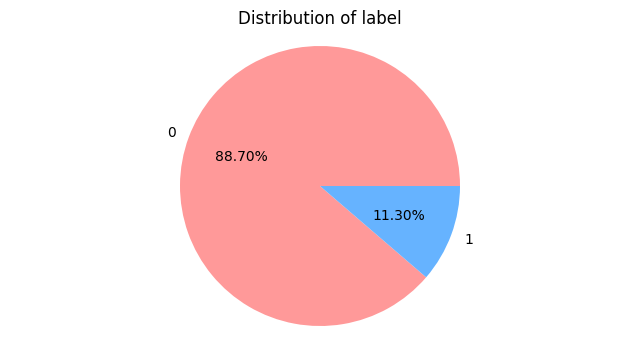

In [ ]:
columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'label']
for i in columns:
  cat_count=cc[i].value_counts()

  # Set the figure size
  plt.figure(figsize=(8, 4))
  colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Custom colors
  plt.pie(cat_count,labels=cat_count.index,colors=colors,autopct ='%.2f%%')   # create a pie chart

  # Set labels and title of the histogram
  plt.title(f'Distribution of {i}')
  plt.axis('equal')

  # Display the histogram
  plt.show()


- 63.3% of the aopplicants are females and 36.7% of the applicants are males.
- 40.3% of the applicants own car, and 59.7% of the applicants do not own car.
- 65.2% of the applicants own property and 34.8% of the applicants do not own property.
- 70.5% of the applicants do not have children.
- Approximately 50% of the applicants source of income is through working.
- Approximately 10% of the applicants do not own House/apartment.


**Bi-variate Analysis**

- Correaltion
- Scatter Plot
- Pair Plot

In [ ]:
corr=cc.corr()  # Compute pairwise correlation of columns

In [ ]:
corr

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
Ind_ID,1.000000,0.032535,0.029888,0.022778,-0.055396,NaN,0.085794,0.008403,-0.037923,0.016950,0.016796
CHILDREN,0.032535,1.000000,0.078111,0.278041,-0.219095,NaN,0.035014,-0.004908,0.025776,0.890248,-0.021646
Annual_income,0.029888,0.078111,1.000000,0.110111,-0.158957,NaN,-0.070541,-0.006384,0.121842,0.050677,0.026875
Birthday_count,0.022778,0.278041,0.110111,1.000000,-0.614352,NaN,0.172951,-0.028952,0.166626,0.264992,-0.044831
Employed_days,-0.055396,-0.219095,-0.158957,-0.614352,1.000000,NaN,-0.231184,-0.003403,-0.118268,-0.238705,0.031408
Mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Phone,0.085794,0.035014,-0.070541,0.172951,-0.231184,NaN,1.000000,0.352439,-0.009594,0.072228,-0.007046
Phone,0.008403,-0.004908,-0.006384,-0.028952,-0.003403,NaN,0.352439,1.000000,0.018105,0.005372,-0.000664
EMAIL_ID,-0.037923,0.025776,0.121842,0.166626,-0.118268,NaN,-0.009594,0.018105,1.000000,0.035098,0.012921
Family_Members,0.016950,0.890248,0.050677,0.264992,-0.238705,NaN,0.072228,0.005372,0.035098,1.000000,-0.030709


<Axes: >

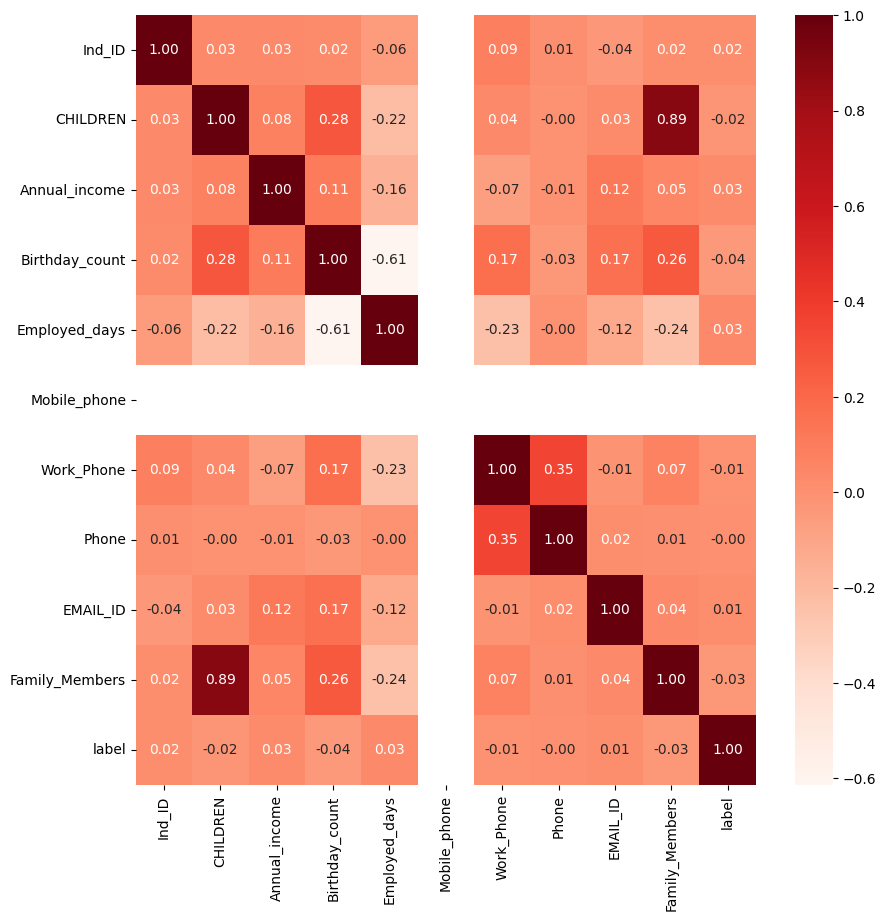

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='Reds',annot =True,fmt='.2f')   # create a heatmap

- There is no feature that is correlated with the target feature.


- The family members and children column are highly correlated.

- Another positive correlation is having a phone and having a work phone.



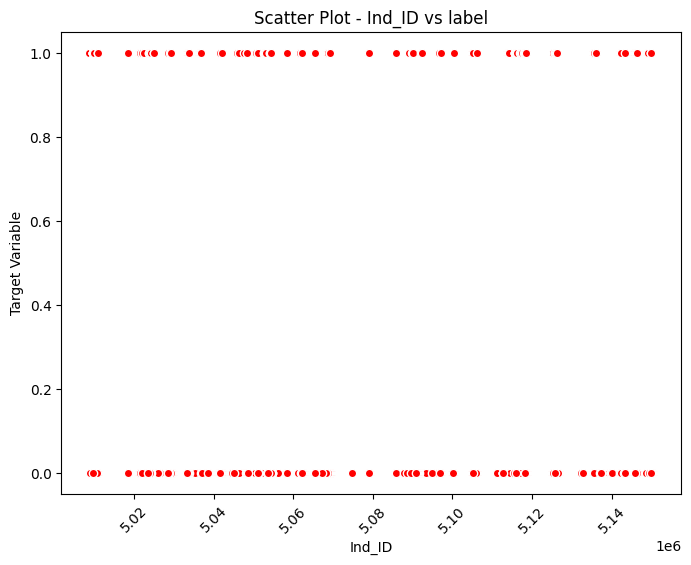

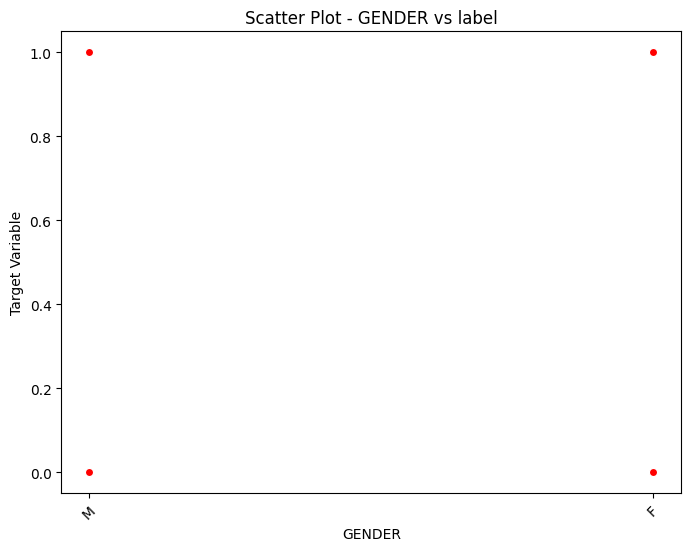

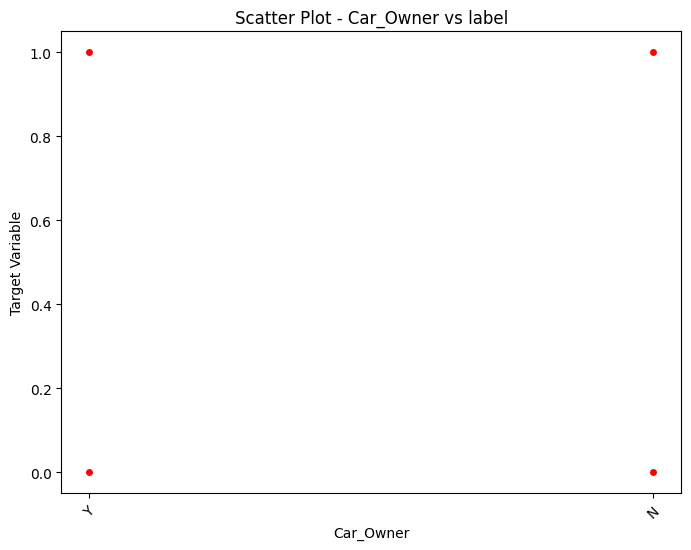

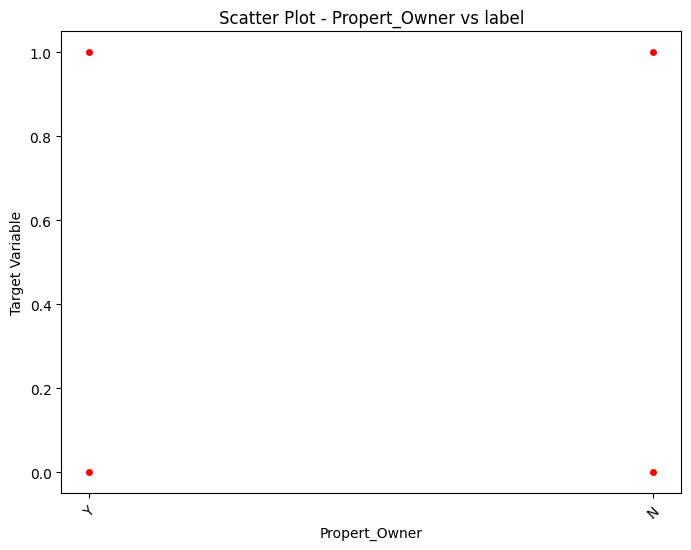

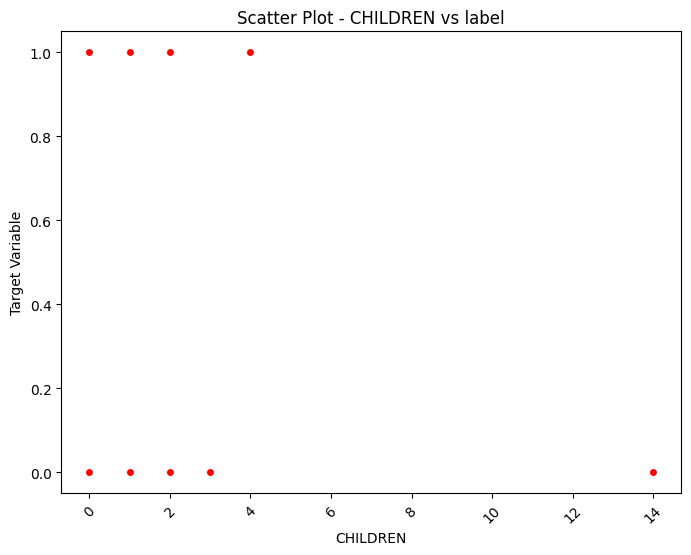

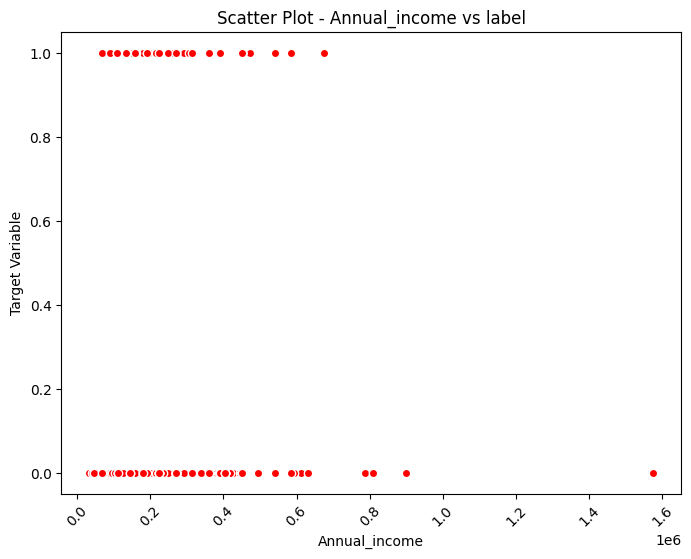

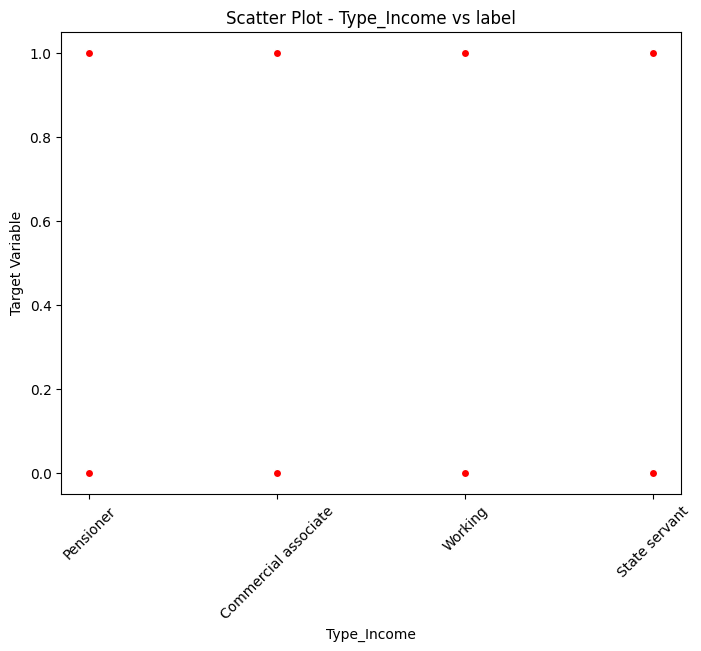

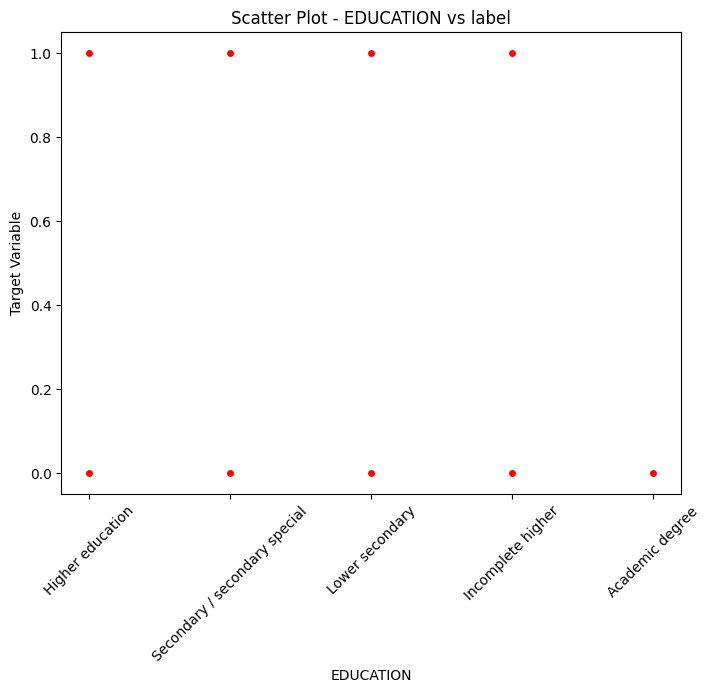

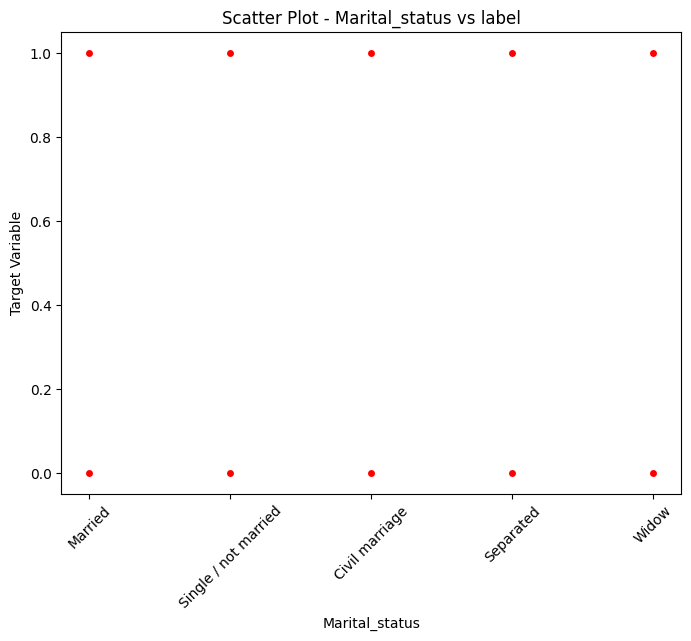

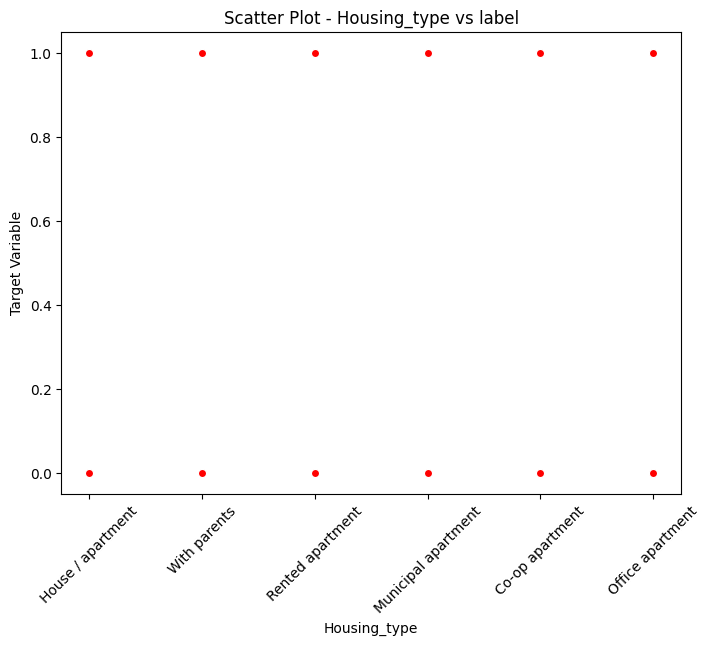

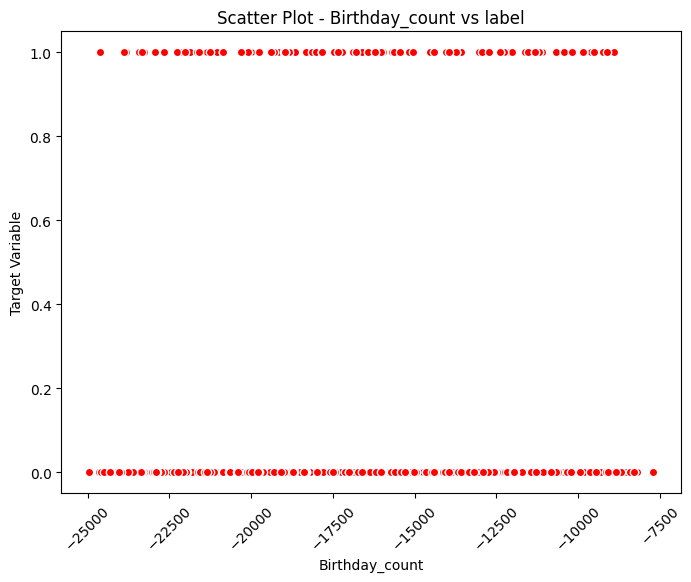

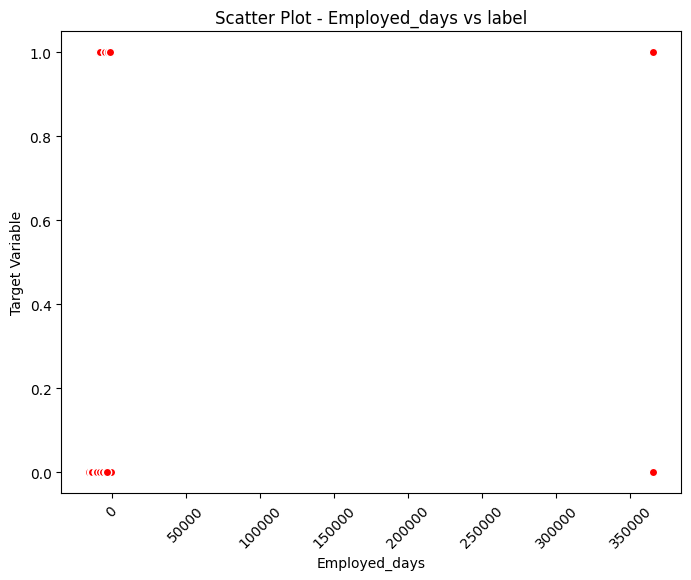

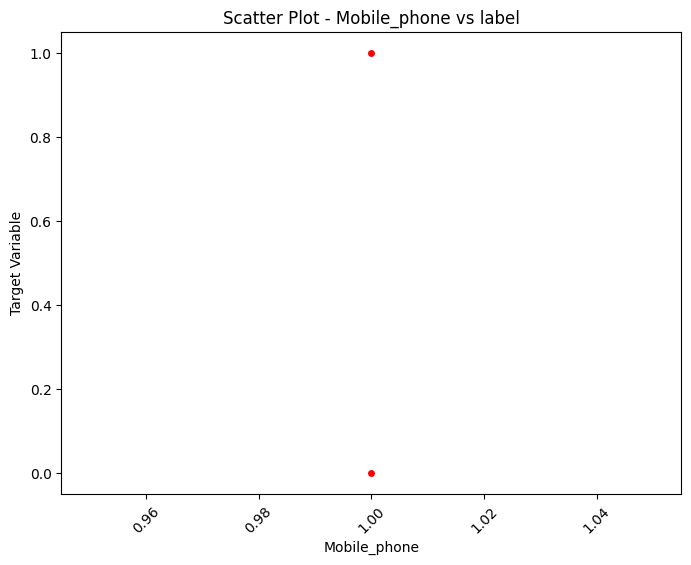

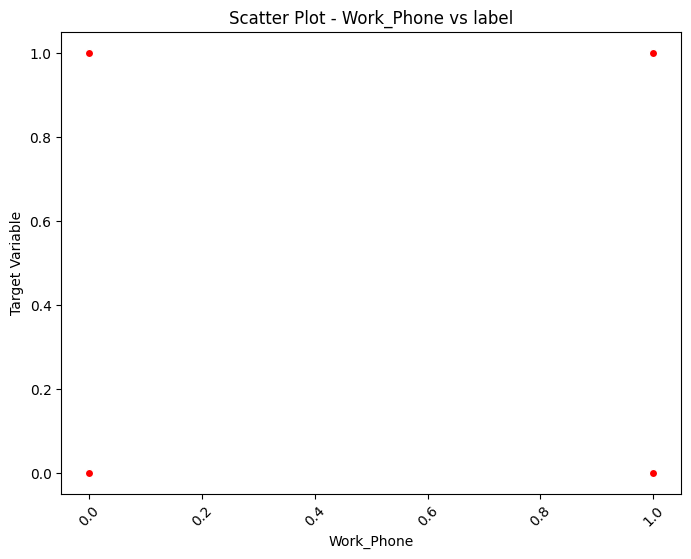

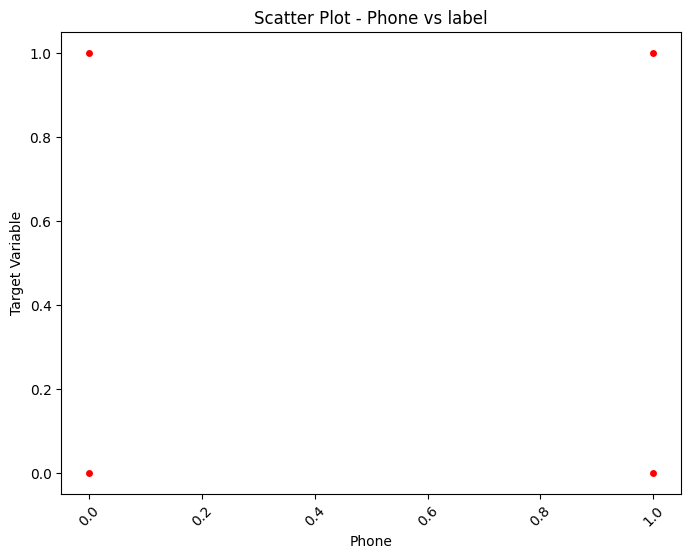

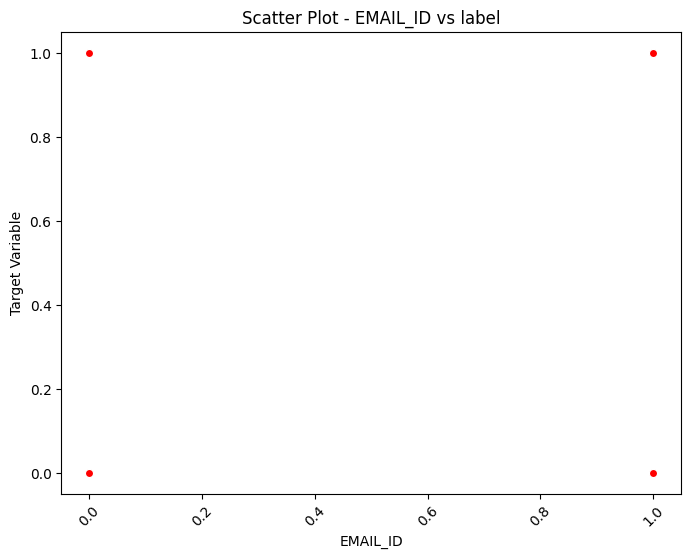

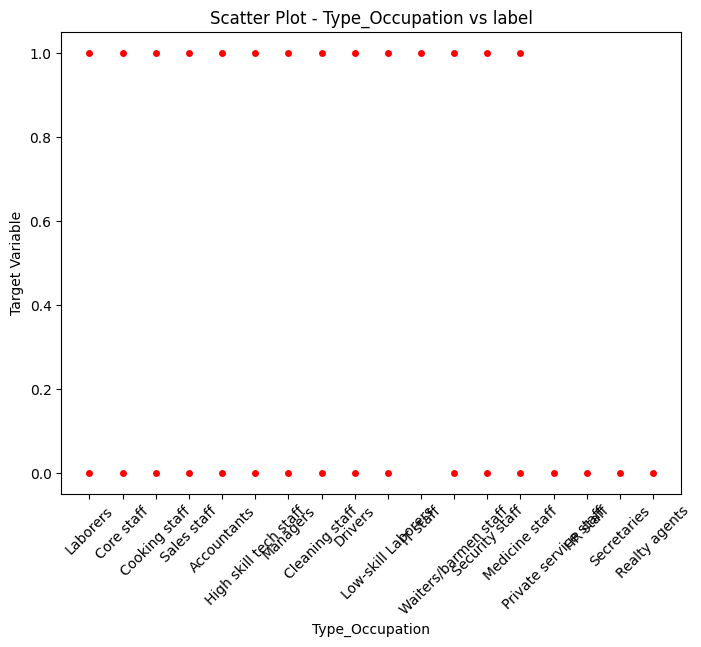

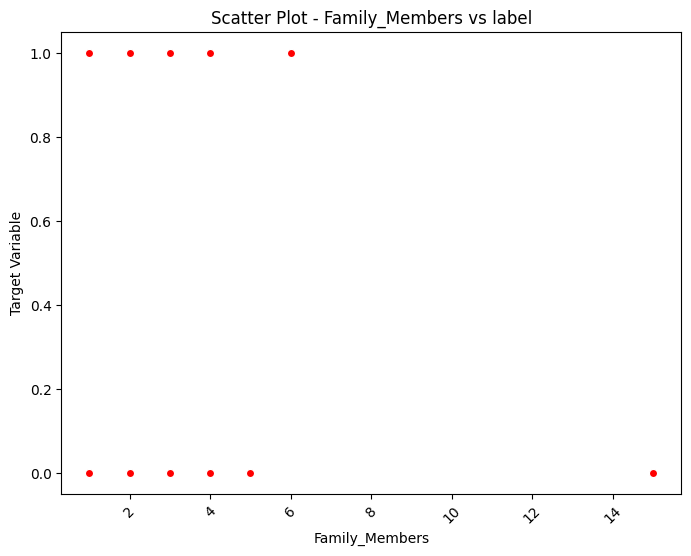

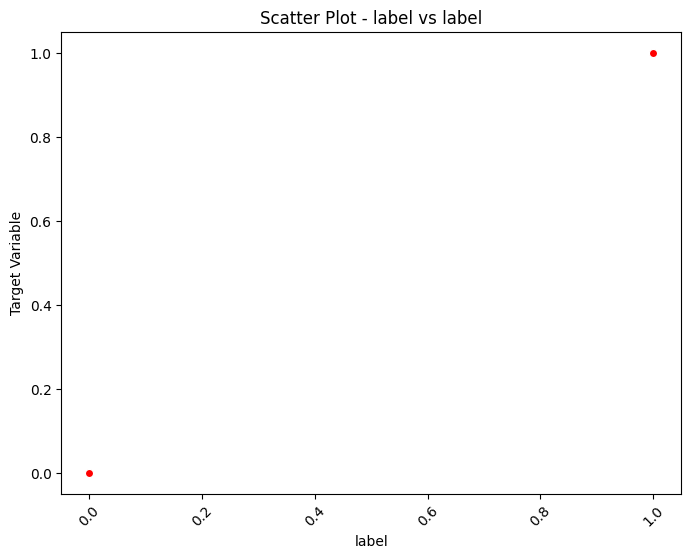

In [ ]:
for i in cc.columns:

  # Set the figure size
  plt.figure(figsize=(8,6))

  # Create a scatter plot using the specified feature (i) and the 'label' column
  plt.scatter(cc[i],cc['label'],color='red',ec='white')  #Create a scatter plot

  # Set labels and title for the plot
  plt.xlabel(i)
  plt.ylabel('Target Variable')
  plt.title(f'Scatter Plot - {i} vs label')

  # Rotate x-axis labels for better readability
  plt.xticks(rotation =45)

  # Show the plot
  plt.show()

plt.figure(figsize=(6,4))
plt.countplot(x='GENDER',hue='label,data=cc)

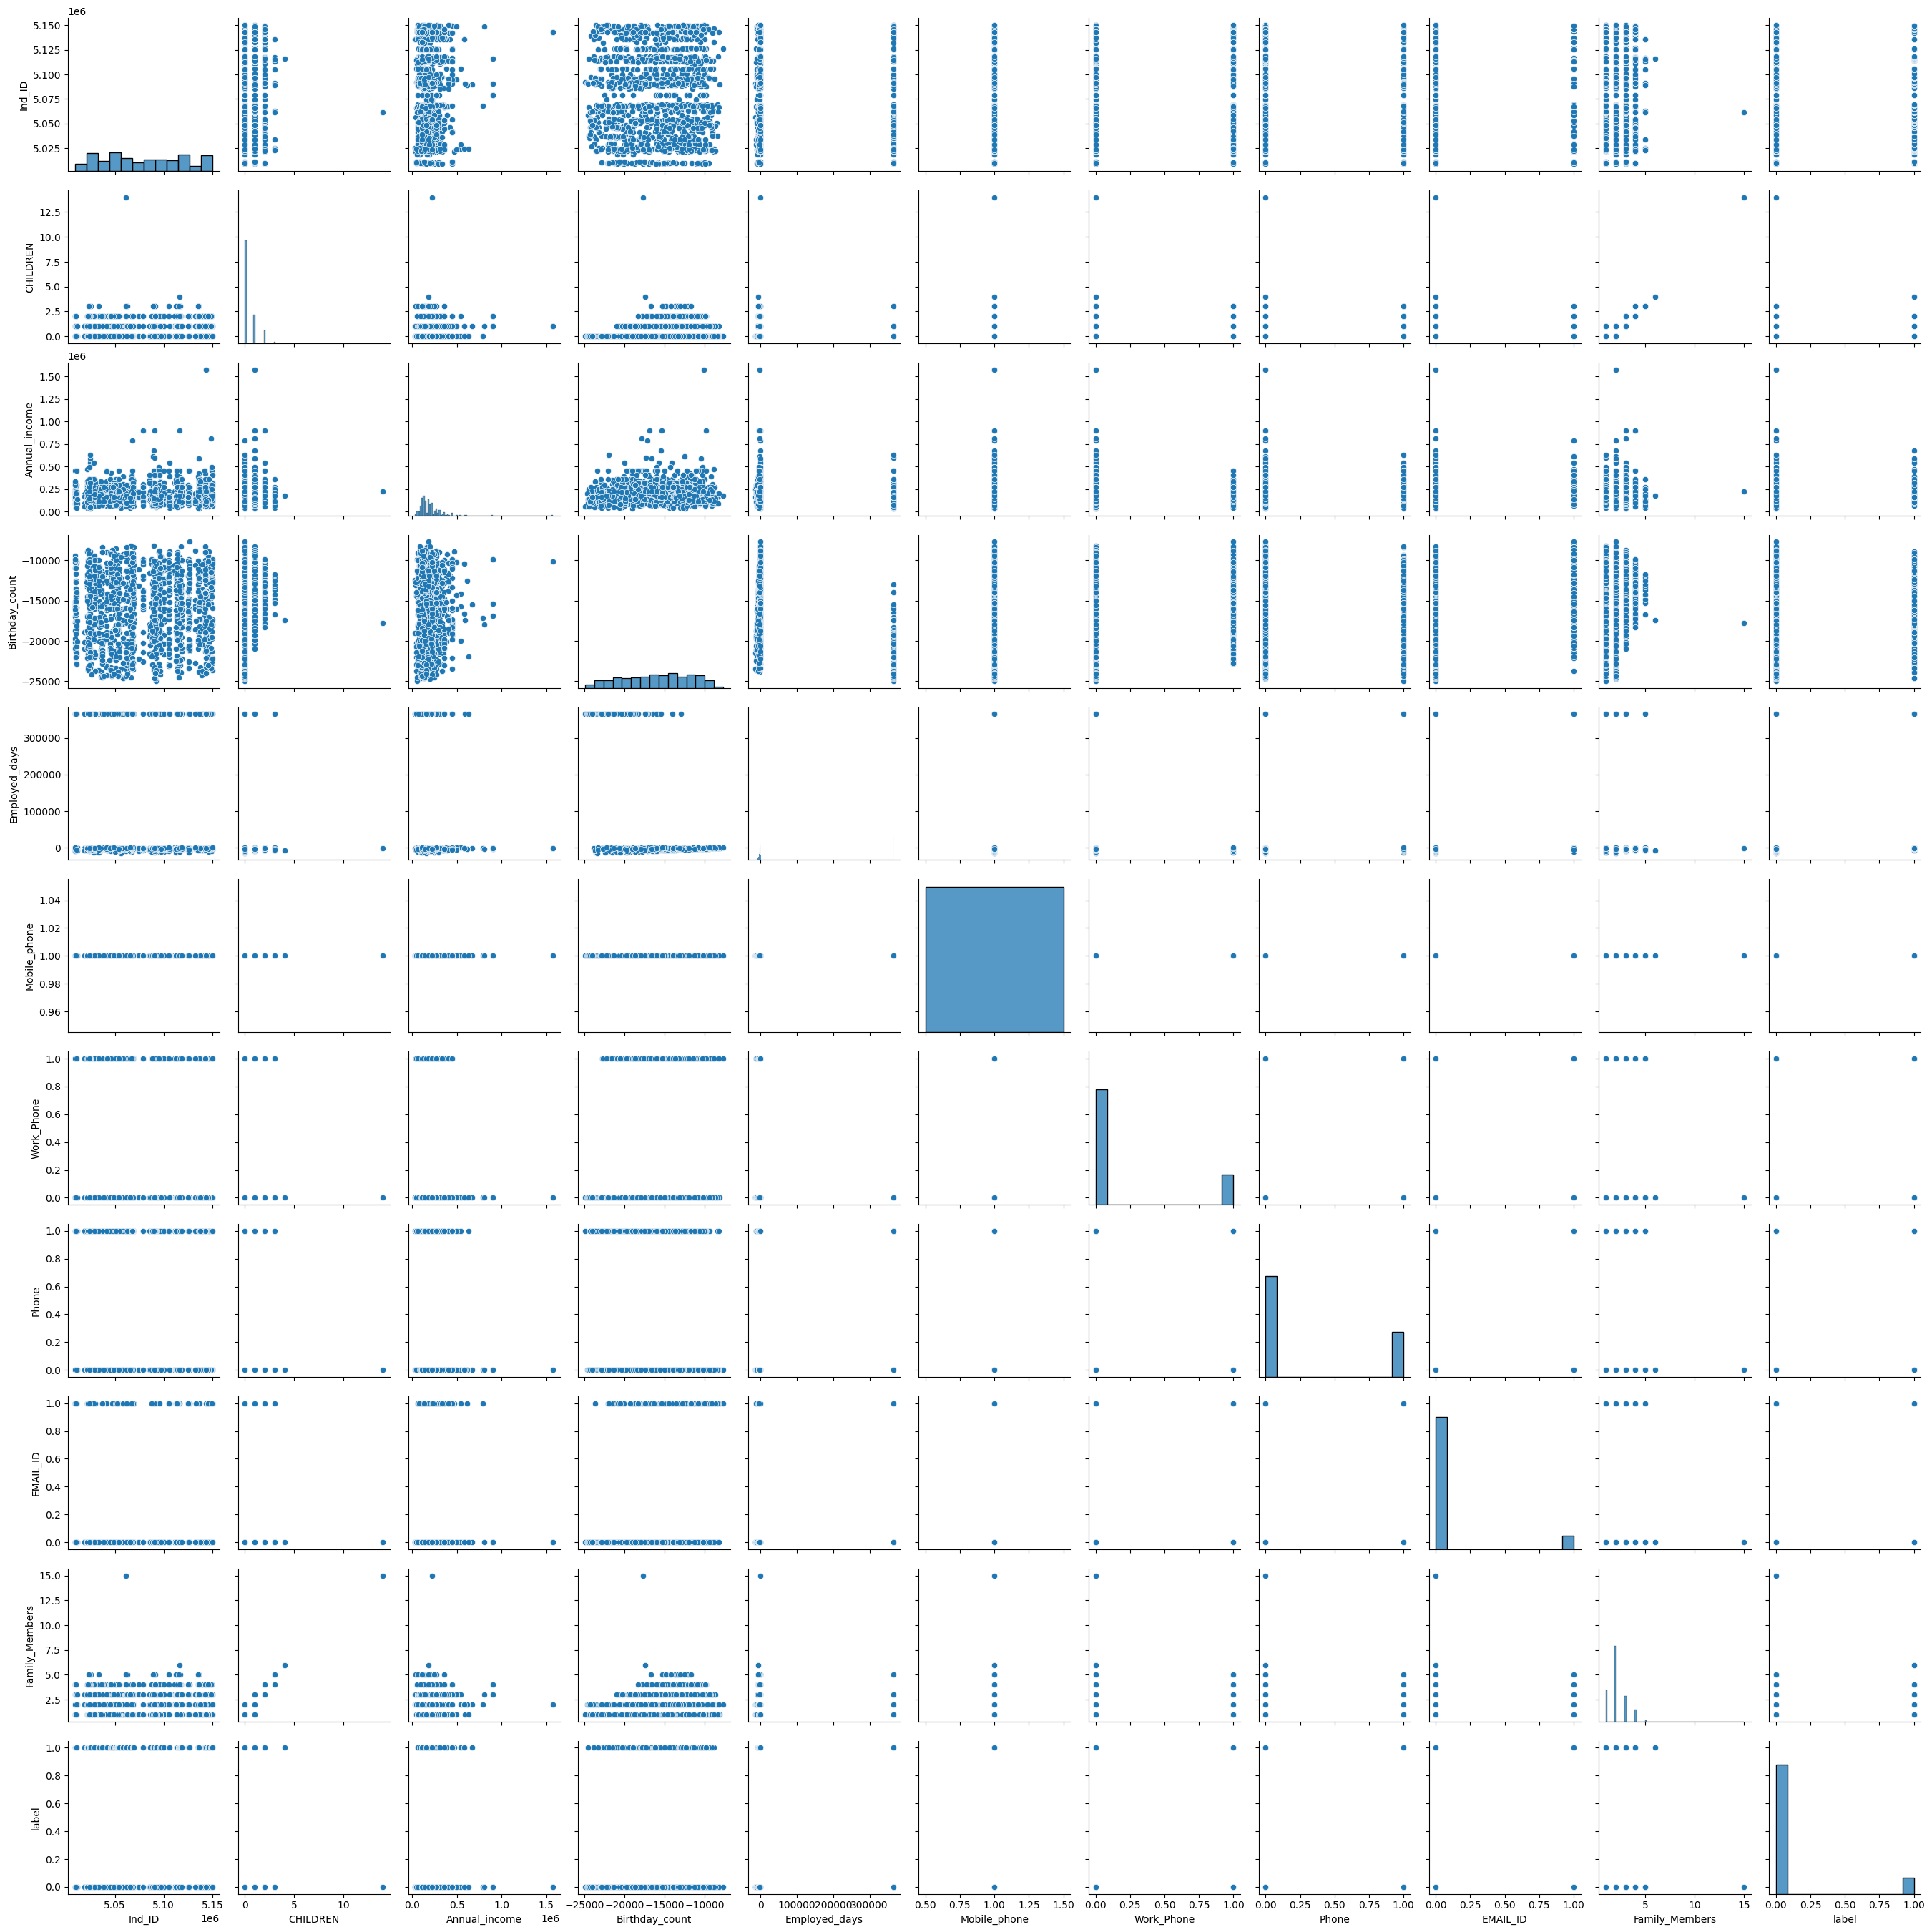

In [ ]:
# Create and display a pair plot using Seaborn

sns.pairplot(cc)

**Data analysis approach to prove or disprove your hypothesis**

 **Credit Card approval by Gender**

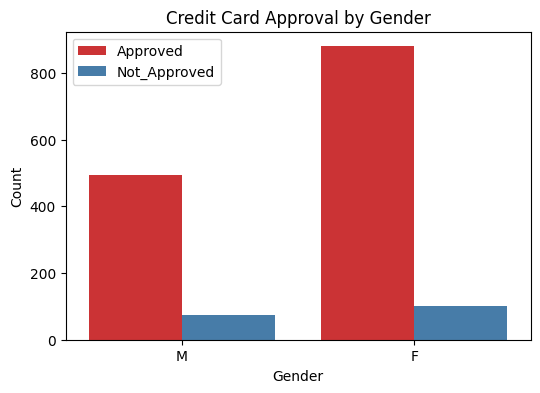

In [ ]:
# Set the figure size
plt.figure(figsize=(6,4))

# Create a countplot to visualize credit card approval by gender with hue indicating the 'label' (Approved or Not Approved)
sns.countplot(x='GENDER',hue='label', data=cc,palette="Set1")

# Add labels and title to the plot
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Credit Card Approval by Gender')
plt.legend(['Approved','Not_Approved'])

# Show the plot
plt.show()

 Insights :

 - The distribution of credit card approval outcomes for different genders, highlighting that more females seem to have been approved for credit cards, while less males appear to have experienced credit card rejections.

In [ ]:
cc.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

**Credit card approval based on Income**

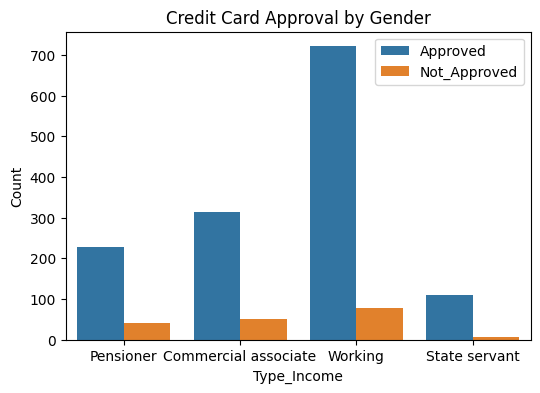

In [ ]:
# Set the figure size
plt.figure(figsize=(6,4))

sns.countplot(x='Type_Income',hue='label',data=cc)   # create a count plot

# Add labels and title to the plot
plt.xlabel('Type_Income')
plt.ylabel('Count')
plt.title('Credit Card Approval by Gender')
plt.legend(['Approved','Not_Approved'])

# Show the plot
plt.show()

**Interpretation:**

- Working applicants are more likely to secure credit card approval due to their stable income, reflecting lower risk and improved financial access.

**Education Level of applicants in Bar chart**

In [ ]:
educ=cc['EDUCATION'].value_counts()

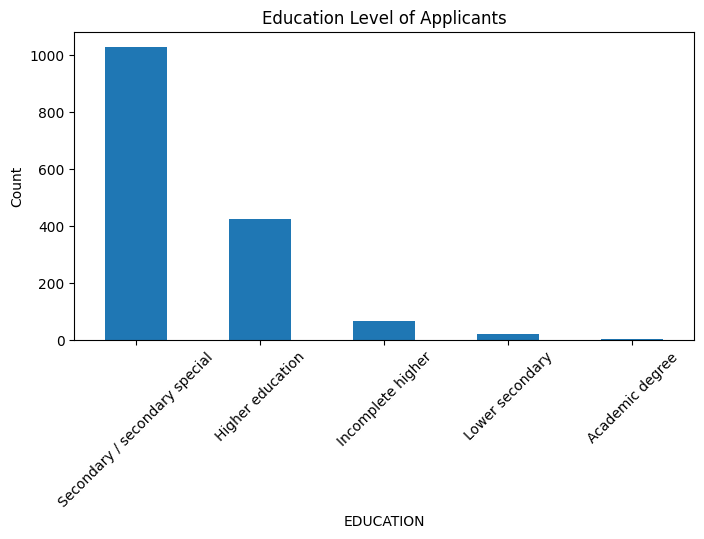

In [ ]:
# Set the figure size
plt.figure(figsize=(8,4))

educ.plot(kind='bar')   # create bar plot

# Add labels and title to the plot
plt.xlabel('EDUCATION')
plt.ylabel('Count')
plt.title('Education Level of Applicants')
plt.xticks(rotation=45)

# Show the plot
plt.show()

Insights :
- From the graph above, most of the applicants have secondary/secondary special level of Education, which is followed by Higher Education. The remaining applicants contribution towards Education level is minimal/negligible.

# **Feature Engineering**

**Changing the categorical variables into numerical colum**ns.


Label encoding :-
- gender
- Car owner
- property owner
- Type income
- Education
- Marital status
- Housing type
- Type occupation **bold text**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()      # Create an instance of the labelEncoder class

In [ ]:
columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

for i in columns:
  if i in cc.columns:
    cc[i]=le.fit_transform(cc[i])
print(cc)

       Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0     5008827       1          1              1         0   180000.00000   
1     5009744       0          1              0         0   315000.00000   
2     5009746       0          1              0         0   315000.00000   
3     5009749       0          1              0         0   191399.32623   
4     5009752       0          1              0         0   315000.00000   
...       ...     ...        ...            ...       ...            ...   
1543  5028645       0          0              1         0   191399.32623   
1544  5023655       0          0              0         0   225000.00000   
1545  5115992       1          1              1         2   180000.00000   
1546  5118219       1          1              0         0   270000.00000   
1547  5053790       0          1              1         0   225000.00000   

      Type_Income  EDUCATION  Marital_status  Housing_type  Birthday_count  \
0        

In [ ]:
cc.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,1,1,1,0,180000.00000,1,1,1,1,-18772.000000,365243,1,0,0,0,8,2,1
1,5009744,0,1,0,0,315000.00000,0,1,1,1,-13557.000000,-586,1,1,1,0,8,2,1
2,5009746,0,1,0,0,315000.00000,0,1,1,1,-16040.342071,-586,1,1,1,0,8,2,1
3,5009749,0,1,0,0,191399.32623,0,1,1,1,-13557.000000,-586,1,1,1,0,8,2,1
4,5009752,0,1,0,0,315000.00000,0,1,1,1,-13557.000000,-586,1,1,1,0,8,2,1


**Standard Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
sc=StandardScaler()

# Extract the target variable column
target_variable =cc['label']

# Remove the target variable column from the dataset
features = cc.drop('label',axis =1)

# Apply standard scaling to the features
scaled_features=sc.fit_transform(features)

# Create a new DataFrame or array combining the scaled features and target variable
cc=pd.DataFrame(scaled_features,columns=features.columns)
cc['label']= target_variable

In [ ]:
cc['label'].value_counts()

0    1373
1     175
Name: label, dtype: int64

**Test/Train Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (Y)


X = cc[['Ind_ID','GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'Annual_income', 'Birthday_count', 'Employed_days', 'Type_Occupation']]
Y = cc[['label']]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)  # Train and test the data.

In [ ]:
X_train

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Annual_income,Birthday_count,Employed_days,Type_Occupation
730,1.616091,-0.761309,-0.821781,0.729845,-0.531645,0.888906,0.691398,0.576153,-0.301490,0.0,-0.512487,-0.669390,-0.319029,-1.225901,-0.501900,0.304991,-0.440463,0.081399
100,0.325115,1.313527,-0.821781,-1.370155,0.756284,0.102156,0.691398,-0.444310,0.737946,0.0,-0.512487,-0.669390,-0.319029,0.884994,-0.942403,0.244486,-0.480756,-1.357026
619,-0.781322,-0.761309,-0.821781,-1.370155,0.756284,0.888906,0.691398,-1.464773,-0.301490,0.0,1.951270,-0.669390,-0.319029,0.884994,-0.942403,1.387182,-0.437450,-2.220082
838,0.318929,1.313527,-0.821781,-1.370155,-0.531645,0.102156,0.691398,-0.444310,-0.301490,0.0,-0.512487,-0.669390,-0.319029,-0.170453,-1.102585,1.044873,-0.451373,0.081399
1419,0.624894,-0.761309,-0.821781,-1.370155,-0.531645,-0.684595,0.691398,0.576153,0.737946,0.0,-0.512487,-0.669390,-0.319029,-1.225901,-0.702128,-1.331278,2.220314,0.081399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.256849,-0.761309,-0.821781,-1.370155,-0.531645,-1.471346,-1.533725,-0.444310,-0.301490,0.0,1.951270,1.493899,3.134513,-0.170453,1.099928,-0.035174,-0.433160,1.807510
1294,-1.640662,1.313527,1.216869,0.729845,0.756284,0.888906,0.691398,-0.444310,-0.301490,0.0,1.951270,-0.669390,-0.319029,0.884994,0.098785,1.386944,-0.433189,0.081399
860,-1.367763,1.313527,1.216869,-1.370155,2.044213,0.888906,0.691398,-0.444310,-0.301490,0.0,-0.512487,1.493899,-0.319029,1.940442,-0.702128,0.701612,-0.432492,0.081399
1459,-0.254084,-0.761309,-0.821781,0.729845,-0.531645,0.888906,-1.533725,-0.444310,-0.301490,0.0,-0.512487,-0.669390,-0.319029,-0.170453,-0.181534,-0.549709,-0.458885,-0.493971


In [ ]:
X_test

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Annual_income,Birthday_count,Employed_days,Type_Occupation
30,-1.196341,-0.761309,-0.821781,0.729845,-0.531645,0.888906,-0.050310,1.596616,2.816818,0.0,-0.512487,-0.669390,-0.319029,-0.170453,-0.902357,0.956259,-0.465542,-1.932397
1514,-0.667161,-0.761309,-0.821781,-1.370155,-0.531645,-0.684595,0.691398,2.617078,0.737946,0.0,-0.512487,1.493899,-0.319029,-1.225901,-1.082563,-1.416319,2.220314,0.081399
1182,-1.197253,-0.761309,-0.821781,-1.370155,2.044213,0.888906,-0.050310,1.596616,-0.301490,0.0,-0.512487,-0.669390,-0.319029,0.884994,-0.982448,0.158968,-0.447852,1.807510
1205,1.607699,-0.761309,-0.821781,0.729845,-0.531645,-0.684595,0.691398,2.617078,-0.301490,0.0,-0.512487,-0.669390,-0.319029,-1.225901,-0.702128,-1.662153,2.220314,0.081399
528,-0.627405,1.313527,-0.821781,0.729845,-0.531645,0.888906,0.691398,-1.464773,-0.301490,0.0,-0.512487,-0.669390,-0.319029,-0.170453,0.299014,1.303094,-0.439446,0.656770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,-0.228307,1.313527,-0.821781,0.729845,-0.531645,0.888906,0.691398,1.596616,-0.301490,0.0,1.951270,1.493899,-0.319029,-1.225901,-0.301672,1.820964,-0.441871,-1.357026
978,-0.246723,-0.761309,1.216869,0.729845,-0.531645,0.888906,0.691398,-0.444310,-0.301490,0.0,-0.512487,-0.669390,-0.319029,-0.170453,0.218922,-1.232897,-0.457347,0.656770
892,0.832499,-0.761309,-0.821781,-1.370155,-0.531645,-0.684595,-1.533725,-0.444310,0.737946,0.0,-0.512487,-0.669390,-0.319029,-0.170453,-0.501900,-0.871770,2.220314,0.081399
109,0.832068,1.313527,-0.821781,-1.370155,-0.531645,0.888906,0.691398,2.617078,0.737946,0.0,-0.512487,-0.669390,-0.319029,-1.225901,0.299014,-0.801736,-0.433429,2.382880


In [ ]:
Y_train

,label
730,0
100,1
619,0
838,0
1419,0
...,...
1130,0
1294,0
860,0
1459,0


In [ ]:
Y_test

,label
30,1
1514,0
1182,0
1205,0
528,0
...,...
312,0
978,0
892,0
109,1


# **Machine Learning**

- **Logistic Regression**

In [ ]:
# Import necessary libraries for logistic regression model and evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
# Create an instance of the LogisticRegression class
logistic_model = LogisticRegression()

# Train the logistic regression model on the training data
logistic_model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
cross_val_scores= cross_val_score(logistic_model,X,Y,cv=5,scoring='accuracy')  # Perform 5-fold cross-validation
mean_cross_val_accuracy =np.mean(cross_val_scores)          #Calculate the mean cross-validation accuracy
print("Cross-Validation Mean Accuracy:", mean_cross_val_accuracy)  #Print the mean accuracy

Cross-Validation Mean Accuracy: 0.8869506211504332


- **KNN Algorithm**

In [ ]:
# Import necessary libraries for a K-Nearest Neighbors (KNN) classifier and evaluation

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
# Create an instance of the KNeighborsClassifier class
KNN_model=KNeighborsClassifier()

# Train the KNeighborsClassifier on the training data
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
cross_val_scores= cross_val_score(KNN_model,X,Y,cv=5,scoring='accuracy')  # Perform 5-fold cross-validation
mean_cross_val_accuracy =np.mean(cross_val_scores)          #Calculate the mean cross-validation accuracy
print("Cross-Validation Mean Accuracy:", mean_cross_val_accuracy)  #Print the mean accuracy

Cross-Validation Mean Accuracy: 0.8539993736298153


- **Decision Tree Algorithm**

In [ ]:
# Import necessary libraries for a Decision Tree classifier and evaluation

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
# Create an instance of the KNeighborsClassifier class
D_Tree_model= DecisionTreeClassifier()

# Train the KNeighborsClassifier model on the training data
D_Tree_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
cross_val_scores= cross_val_score(D_Tree_model,X,Y,cv=5,scoring='accuracy')  # Perform 5-fold cross-validation
mean_cross_val_accuracy =np.mean(cross_val_scores)          #Calculate the mean cross-validation accuracy
print("Cross-Validation Mean Accuracy:", mean_cross_val_accuracy)  #Print the mean accuracy

Cross-Validation Mean Accuracy: 0.8165257333750914


- **Random Forest Algorithm**

In [ ]:
# Import necessary libraries for a Random Forest classifier and evaluation

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
# Create an instance of the RandomForest Classifier class
Random_forest_model= RandomForestClassifier()

# Train the RandomForest model on the training data
Random_forest_model.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
cross_val_scores= cross_val_score(Random_forest_model,X,Y,cv=5,scoring='accuracy')  # Perform 5-fold cross-validation
mean_cross_val_accuracy =np.mean(cross_val_scores)          #Calculate the mean cross-validation accuracy
print("Cross-Validation Mean Accuracy:", mean_cross_val_accuracy)  #Print the mean accuracy

Cross-Validation Mean Accuracy: 0.8817788913247728


- **SVM Algorithm**

In [ ]:
# Import necessary libraries for a Support Vector Machine (SVM) classifier and evaluation

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score


In [ ]:
# Create an instance of the SVM Classifier class
svm_model= SVC()

# Train the SVM model on the training data
svm_model.fit(X_train,Y_train)

SVC()

In [ ]:
cross_val_scores= cross_val_score(svm_model,X,Y,cv=5,scoring='accuracy')  # Perform 5-fold cross-validation
mean_cross_val_accuracy =np.mean(cross_val_scores)          #Calculate the mean cross-validation accuracy
print("Cross-Validation Mean Accuracy:", mean_cross_val_accuracy)  #Print the mean accuracy

Cross-Validation Mean Accuracy: 0.8863054598601107


# **Prediction**

- **Logistic Regression**

In [ ]:
# Make predictions on the test data

lr_predict= logistic_model.predict(X_test)


In [ ]:
lr_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

- **KNN**

In [ ]:
# Make predictions on the test data

KNN_predict= KNN_model.predict(X_test)


In [ ]:
KNN_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

- **Decission Tree**

In [ ]:
# Make predictions on the test data

D_Tree_predict= D_Tree_model.predict(X_test)

In [ ]:
D_Tree_predict

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

- **Random Forest**

In [ ]:
# Make predictions on the test data

Random_forest_predict= Random_forest_model.predict(X_test)

In [ ]:
Random_forest_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

- **SVM**

In [ ]:
# Make predictions on the test data

Svm_predict = svm_model.predict(X_test)

In [ ]:
Svm_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# **Evaluating the Prediction**

In [ ]:
# Import necessary libraries for model evaluation

from sklearn.metrics import accuracy_score,precision_score, confusion_matrix, classification_report

- **Logistic Regression**

In [ ]:
# Calculate the accuracy of the logistic regression model's predictions
accuracy_lr = accuracy_score(Y_test,lr_predict)

# Print the accuracy score
print("Accuracy:", accuracy_lr)

Accuracy: 0.9075268817204301


In [ ]:
# Calculate the precision score for the logistic regression model's positive predictions
lr_precision = precision_score(Y_test, lr_predict,zero_division=0) # The zero_division parameter is set to 0 to handle cases where there are no true positive predictions

# Print the precision score
print("Precision Score",lr_precision)

Precision Score 0.0


In [ ]:
# Generate a confusion matrix to assess the logistic regression model's performance
lr_confusion_matrix = confusion_matrix(Y_test, lr_predict)

# Print the confusion matrix
print("Score Of Confusion Matrix",lr_confusion_matrix)

Score Of Confusion Matrix [[422   0]
 [ 43   0]]


In [ ]:
# Generate a classification report to assess the logistic regression model's performance
lr_classification_report = classification_report(Y_test, lr_predict,zero_division=0)

# Print the classification report
print("Score Of Classification report",lr_classification_report)

Score Of Classification report               precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



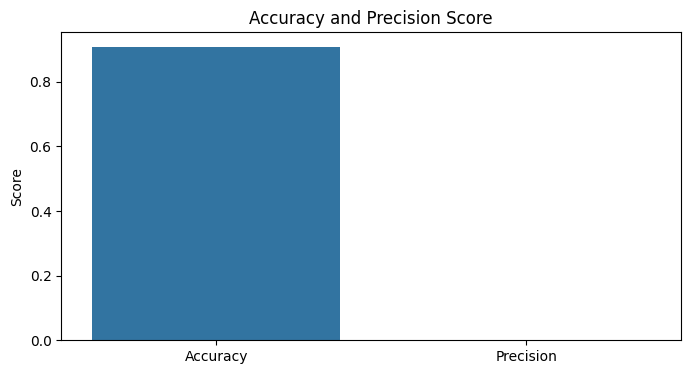

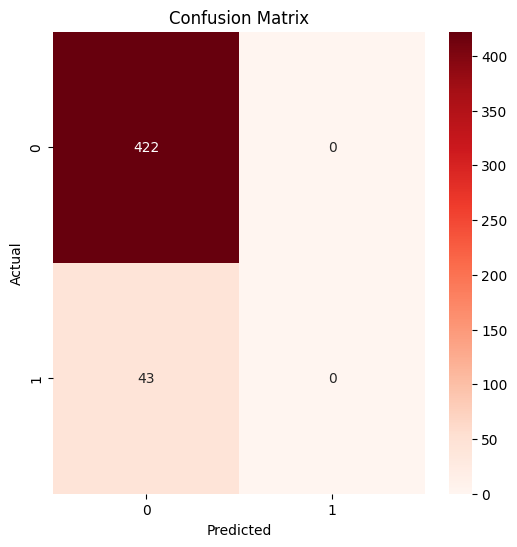

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



In [ ]:
# Set the figure size

plt.figure(figsize=(8,4))
scores ={'Accuracy': accuracy_lr,'Precision':lr_precision}
sns.barplot(x=list(scores.keys()),y=list(scores.values()))  # plot a bar plot for accuracy and precision

# Add labels and title to the plot
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')

# Show the plot
plt.show()


# Set the figure size

plt.figure(figsize=(6, 6))
sns.heatmap(lr_confusion_matrix, annot=True, cmap='Reds', fmt='g')  # Craete a heatmap

# Add labels and title to the plot

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()

print("Classification Report:")
print(lr_classification_report)


- **KNN**

In [ ]:
# Calculate the accuracy of the KNN model's predictions
accuracy_KNN = accuracy_score(Y_test,KNN_predict)

# Print the accuracy score
print("Accuracy:", accuracy_KNN)


Accuracy: 0.8903225806451613


In [ ]:
# Calculate the precision score for the KNN model's positive predictions
KNN_precision = precision_score(Y_test, KNN_predict,zero_division=0)

# Print the precision score
print("Precision Score",KNN_precision )

Precision Score 0.2777777777777778


In [ ]:
# Generate a confusion matrix to assess the KNN model's performance
KNN_confusion_matrix = confusion_matrix(Y_test, KNN_predict)

# Print the confusion matrix
print("Score Of Confusion Matrix",KNN_confusion_matrix)

Score Of Confusion Matrix [[409  13]
 [ 38   5]]


In [ ]:
# Generate a classification report to assess the KNN model's performance
KNN_classification_report = classification_report(Y_test, KNN_predict)

# Print the classification report
print("Score Of Classification report",KNN_classification_report)

Score Of Classification report               precision    recall  f1-score   support

           0       0.91      0.97      0.94       422
           1       0.28      0.12      0.16        43

    accuracy                           0.89       465
   macro avg       0.60      0.54      0.55       465
weighted avg       0.86      0.89      0.87       465



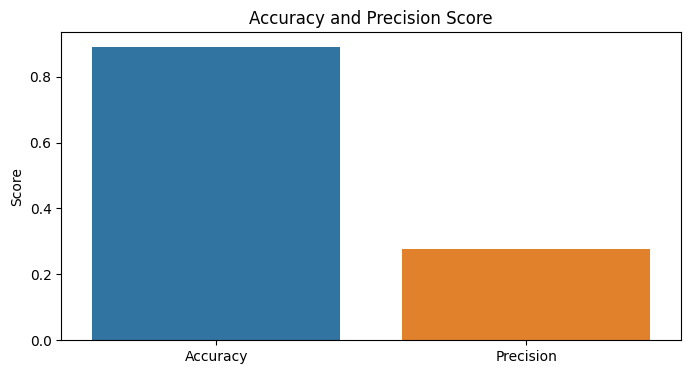

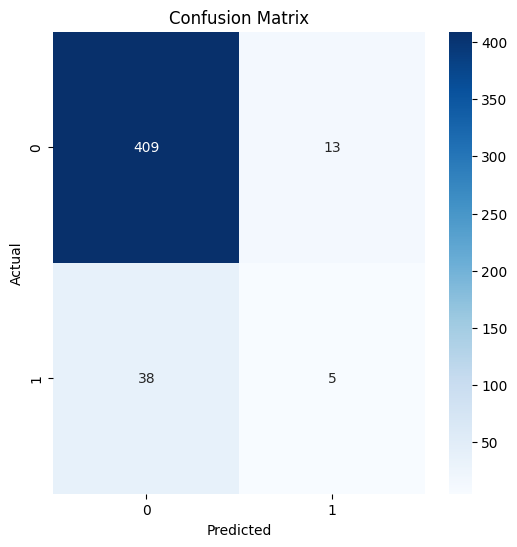

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       422
           1       0.28      0.12      0.16        43

    accuracy                           0.89       465
   macro avg       0.60      0.54      0.55       465
weighted avg       0.86      0.89      0.87       465



In [ ]:
# Set the figure size
plt.figure(figsize=(8,4))

scores ={'Accuracy': accuracy_KNN,'Precision':KNN_precision} # plot a bar plot for accuracy and precision

# Add labels and title to the plot
sns.barplot(x=list(scores.keys()),y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')

# Show the plot
plt.show()


# Set the figure size
plt.figure(figsize=(6, 6))
sns.heatmap(KNN_confusion_matrix, annot=True, cmap='Blues', fmt='g')    # Craete a heatmap
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()

print("Classification Report:")
print(KNN_classification_report)

- **Decision Tree**

In [ ]:
# Calculate the accuracy of the Decision Tree model's predictions
accuracy_D_Tree =   accuracy_score(Y_test,D_Tree_predict)

# Print the accuracy score
print("Accuracy:",accuracy_D_Tree)

Accuracy: 0.843010752688172


In [ ]:
# Calculate the precision score for the Decision Tree model's positive predictions
D_Tree_precision = precision_score(Y_test, D_Tree_predict,zero_division=0)

# Print the precision score
print("Precision Score",D_Tree_precision  )

Precision Score 0.32142857142857145


In [ ]:
# Generate a confusion matrix to assess the Decision Tree model's performance
D_tree_confusion_matrix = confusion_matrix(Y_test, D_Tree_predict)

# Print the confusion matrix
print("Score Of Confusion Matrix",D_tree_confusion_matrix)

Score Of Confusion Matrix [[365  57]
 [ 16  27]]


In [ ]:
# Generate a classification report to assess the Decision Tree model's performance
D_tree_classification_report = classification_report(Y_test, D_Tree_predict)

# Print the classification report
print("Score Of Classification report",D_tree_classification_report)

Score Of Classification report               precision    recall  f1-score   support

           0       0.96      0.86      0.91       422
           1       0.32      0.63      0.43        43

    accuracy                           0.84       465
   macro avg       0.64      0.75      0.67       465
weighted avg       0.90      0.84      0.86       465



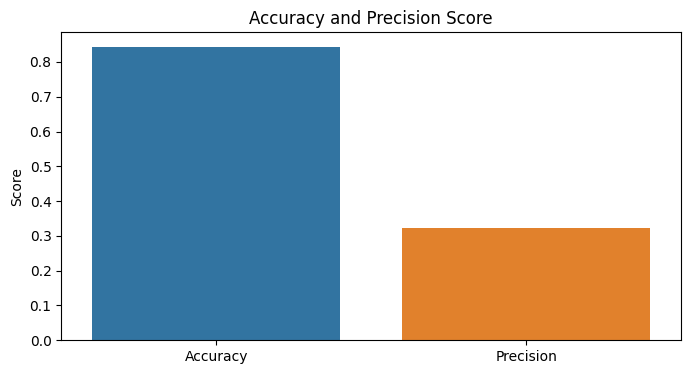

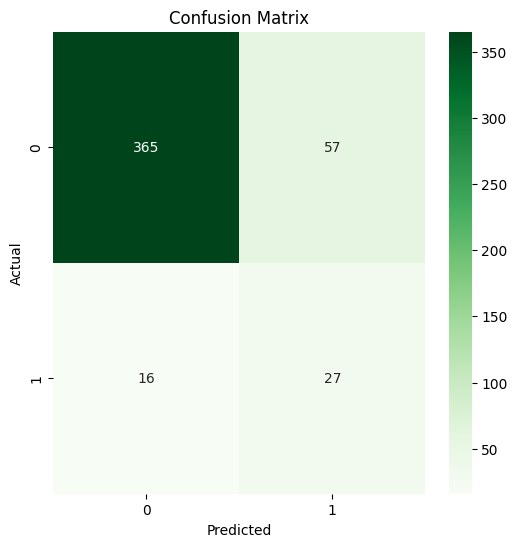

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       422
           1       0.32      0.63      0.43        43

    accuracy                           0.84       465
   macro avg       0.64      0.75      0.67       465
weighted avg       0.90      0.84      0.86       465



In [ ]:
# Set the figure size
plt.figure(figsize=(8,4))

# plot a bar plot for accuracy and precision
score={'Accuracy':accuracy_D_Tree,'Precision':D_Tree_precision}
sns.barplot(x=list(score.keys()),y=list(score.values()))

# Add labels and title to the plot
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')

# Show the plot
plt.show()



# Set the figure size
plt.figure(figsize=(6,6))
sns.heatmap(D_tree_confusion_matrix,annot =True,cmap='Greens', fmt='g')

# Add labels and title to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()

print("Classification Report:")
print(D_tree_classification_report)

- **Random Forest**

In [ ]:
# Calculate the accuracy of the Random Forest model's predictions
accuracy_random_forest =   accuracy_score(Y_test,Random_forest_predict)

# Print the accuracy score
print("Accuracy:",accuracy_random_forest)

Accuracy: 0.946236559139785


In [ ]:
# Calculate the precision score for the Random Forest model's positive predictions
Random_forest_precision = precision_score(Y_test, Random_forest_predict,zero_division=0)

# Print the precision score
print("Precision Score",Random_forest_precision )

Precision Score 0.95


In [ ]:
# Generate a confusion matrix to assess the Random Forest model's performance
Random_forest_confusion_matrix = confusion_matrix(Y_test, Random_forest_predict)

# Print the confusion matrix
print("Score Of Confusion Matrix",Random_forest_confusion_matrix)

Score Of Confusion Matrix [[421   1]
 [ 24  19]]


In [ ]:
# Generate a classification report to assess the Random Forest model's performance
Random_forest_classification_report = classification_report(Y_test, Random_forest_predict)

# Print the classification report
print("Score Of Classification report",Random_forest_classification_report)

Score Of Classification report               precision    recall  f1-score   support

           0       0.95      1.00      0.97       422
           1       0.95      0.44      0.60        43

    accuracy                           0.95       465
   macro avg       0.95      0.72      0.79       465
weighted avg       0.95      0.95      0.94       465



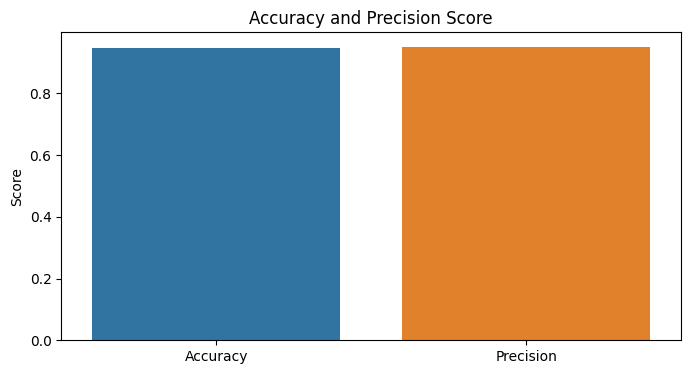

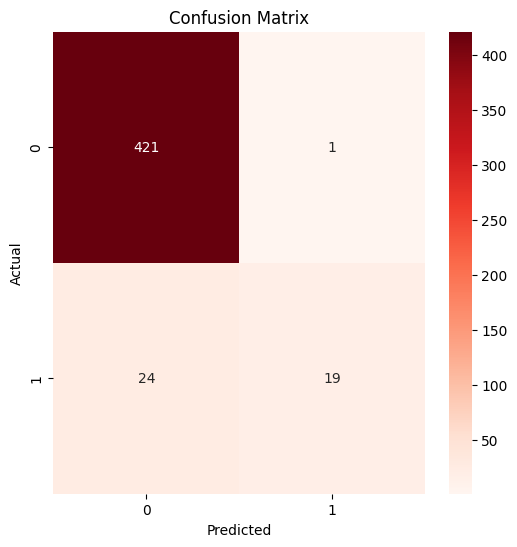

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       422
           1       0.95      0.44      0.60        43

    accuracy                           0.95       465
   macro avg       0.95      0.72      0.79       465
weighted avg       0.95      0.95      0.94       465



In [ ]:
# Set the figure size
plt.figure(figsize=(8,4))

score={'Accuracy':accuracy_random_forest,'Precision':Random_forest_precision}
sns.barplot(x=list(score.keys()),y=list(score.values()))   # create a barplot

# Add labels and title to the plot
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')

# Show the plot
plt.show()


# Set the figure size
plt.figure(figsize=(6,6))
sns.heatmap(Random_forest_confusion_matrix,annot =True,cmap='Reds', fmt='g')  # create a heatmap

# Add labels and title to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()

print("Classification Report:")
print(Random_forest_classification_report)

- **SVM**

In [ ]:
# Calculate the accuracy of the SVM classifier's predictions
accuracy_svm =   accuracy_score(Y_test,Svm_predict)

# Print the accuracy score
print("Accuracy:",accuracy_svm)

Accuracy: 0.9075268817204301


In [ ]:
# Calculate the precision score for the SVM classifier's positive predictions
SVM_precision = precision_score(Y_test, Svm_predict,zero_division=0)

# Print the precision score
print("Precision Score",SVM_precision  )

Precision Score 0.0


In [ ]:
# Generate a confusion matrix to assess the SVM classifier's performance
Svm_confusion_matrix = confusion_matrix(Y_test, Svm_predict)

# Print the confusion matrix
print("Score Of Confusion Matrix",Svm_confusion_matrix)

Score Of Confusion Matrix [[422   0]
 [ 43   0]]


In [ ]:
# Generate a classification report for the SVM classifier's performance
Svm_classification_report = classification_report(Y_test, Svm_predict)

# Print the classification report
print("Score Of Classification report",Svm_classification_report)

Score Of Classification report               precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



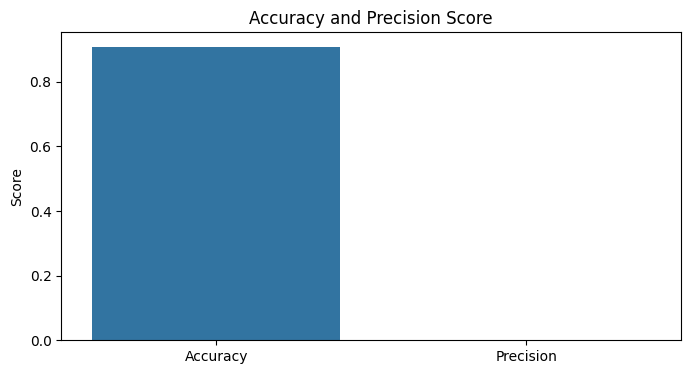

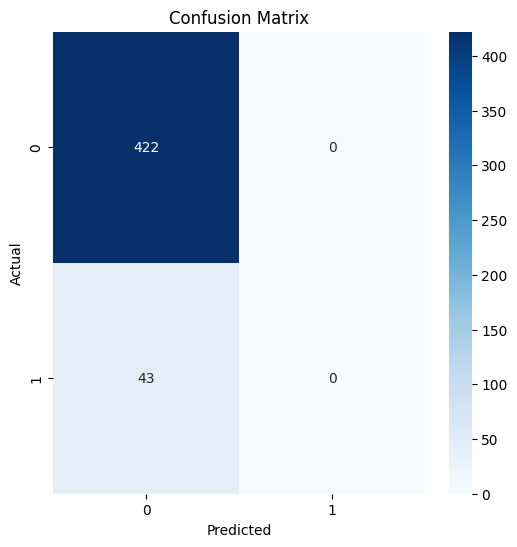

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



In [ ]:
# Set the figure size
plt.figure(figsize=(8,4))

score={'Accuracy':accuracy_svm,'Precision':SVM_precision}
sns.barplot(x=list(score.keys()),y=list(score.values()))   # create a barplot

# Add labels and title to the plot
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')

# Show the plot
plt.show()


# Set the figure size
plt.figure(figsize=(6,6))
sns.heatmap(Svm_confusion_matrix,annot =True,cmap='Blues', fmt='g')   # Create a Heatmap

# Add labels and title to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()

print("Classification Report:")
print(Svm_classification_report )

**Accuracy of every model**

In [ ]:
print("Logistic_Regression_Accuracy:", accuracy_lr)
print('--'*25)

print("KNN_Accuracy:", accuracy_KNN)
print('--'*25)

print("D_Tree_Accuracy:", accuracy_D_Tree)
print('--'*25)

print("Random_forest_Accuracy:", accuracy_random_forest)
print('--'*25)

print("SVM_Accuracy:", accuracy_svm)

Logistic_Regression_Accuracy: 0.9075268817204301
--------------------------------------------------
KNN_Accuracy: 0.8903225806451613
--------------------------------------------------
D_Tree_Accuracy: 0.843010752688172
--------------------------------------------------
Random_forest_Accuracy: 0.946236559139785
--------------------------------------------------
SVM_Accuracy: 0.9075268817204301


# **Conclusion**

**Based on the evaluation, we can conclude that Random forest is the best algorithm to use for this dataset.**

**Thankyou..**